#**Amazon Stock Market Predictions - Data Science Final Project**
#**Hana Meah - 16048117**
##**Prophet model**
##Part 3 out of 3 code files
##File 1 : LSTM model - train from scratch option 1
##File 2 : GRU model - train from scratch option 2
##File 3 : Prophet - pretrained option

In [1]:
import pandas as pd
from prophet import Prophet
import yfinance as yf
import matplotlib.pyplot as plt


In [2]:

# Load Amazon stock data from Yahoo Finance from 2001-01-02 to 2024-07-08
ticker = "AMZN"
df = yf.download(ticker, start="2001-01-02", end="2024-07-08")

# Drop any rows with null values
df.dropna(inplace=True)

# Prepare the data for Prophet
prophet_df = df[['Close']].reset_index()
prophet_df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


[*********************100%%**********************]  1 of 1 completed


In [3]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Make predictions for the entire data range
future = model.make_future_dataframe(periods=0)  # No future dates, just the available data
forecast = model.predict(future)


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpov6qic9l/t2n3cxcy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpov6qic9l/jftkr3jn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=96181', 'data', 'file=/tmp/tmpov6qic9l/t2n3cxcy.json', 'init=/tmp/tmpov6qic9l/jftkr3jn.json', 'output', 'file=/tmp/tmpov6qic9l/prophet_modelo4rr2vzk/prophet_model-20240822012034.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
01:20:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:20:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


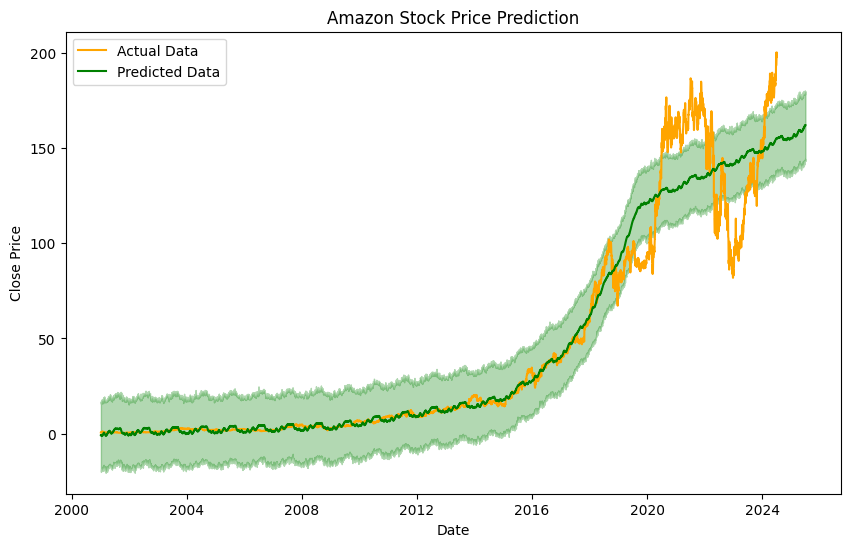

In [10]:
# Plot actual vs. predicted data
plt.figure(figsize=(10, 6))
plt.plot(prophet_df['ds'], prophet_df['y'], label='Actual Data', color='orange')
plt.plot(forecast['ds'], forecast['yhat'], label='Predicted Data', color='green')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='green', alpha=0.3)
plt.title('Amazon Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()
